In [1]:
# EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
import pandas as pd
diabetes = pd.read_csv("diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

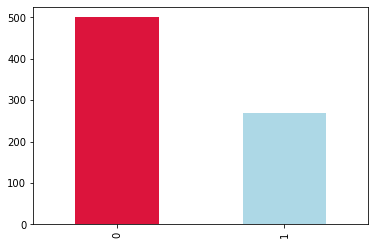

In [5]:
import matplotlib.pyplot as plt
diabetes['Outcome'].value_counts().plot(kind="bar",color = ['crimson','lightblue']);

In [6]:
pd.crosstab(diabetes.Age,diabetes.Outcome)

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


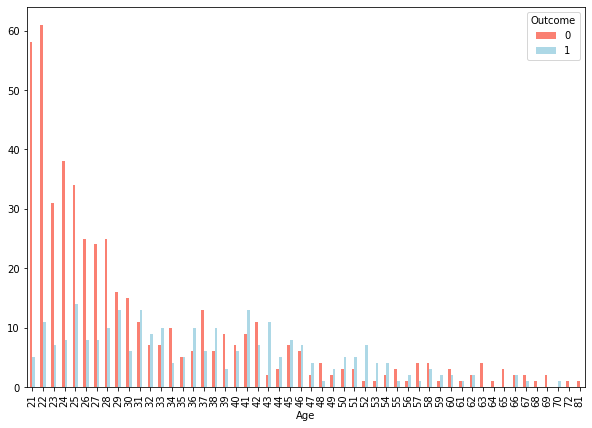

In [7]:
pd.crosstab(diabetes.Age,diabetes.Outcome).plot(kind="bar",
                                                figsize=(15,10),
                                                color=['salmon','lightblue']);

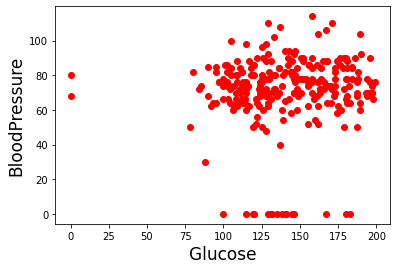

In [8]:
plt.scatter(diabetes.Glucose[diabetes.Outcome==1],
            diabetes.BloodPressure[diabetes.Outcome==1],
            c="red");
plt.xlabel("Glucose",fontsize=17);
plt.ylabel("BloodPressure",fontsize=17);

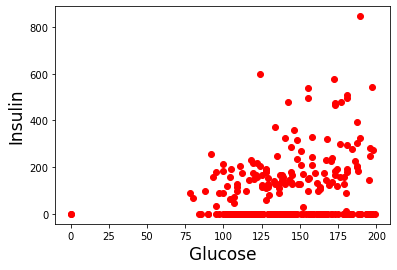

In [9]:
plt.scatter(diabetes.Glucose[diabetes.Outcome==1],
            diabetes.Insulin[diabetes.Outcome==1],
            c="red");
plt.xlabel("Glucose",fontsize=17);
plt.ylabel("Insulin",fontsize=17);

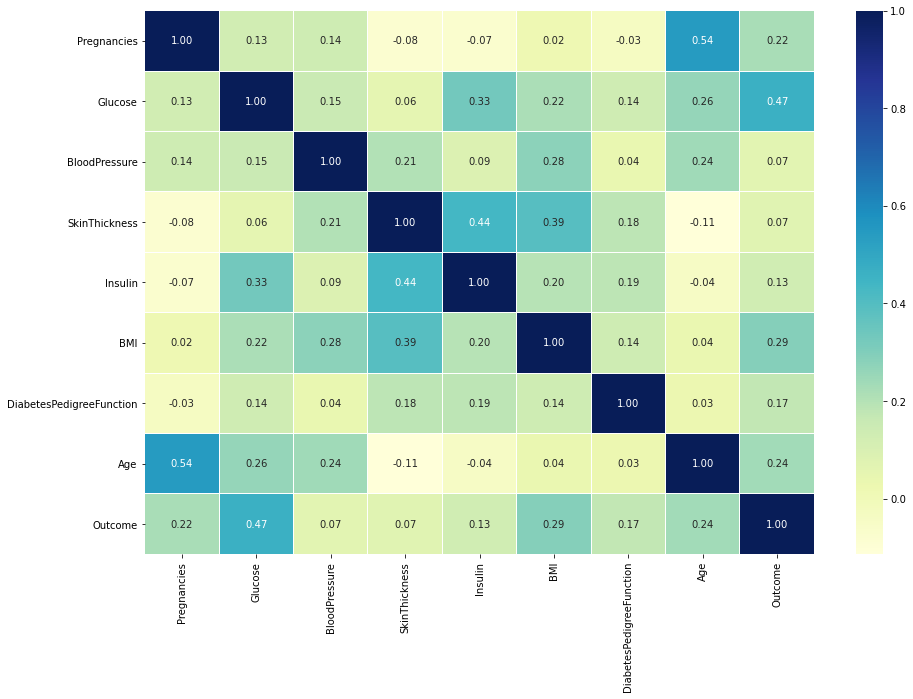

In [10]:
import seaborn as sns
corr_matrix = diabetes.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.2,
                fmt='.2f',
                cmap="YlGnBu");

## as we see correlation matrix...
- glucose is very good with outcome its 0.47
- pregnancies goes well with Age

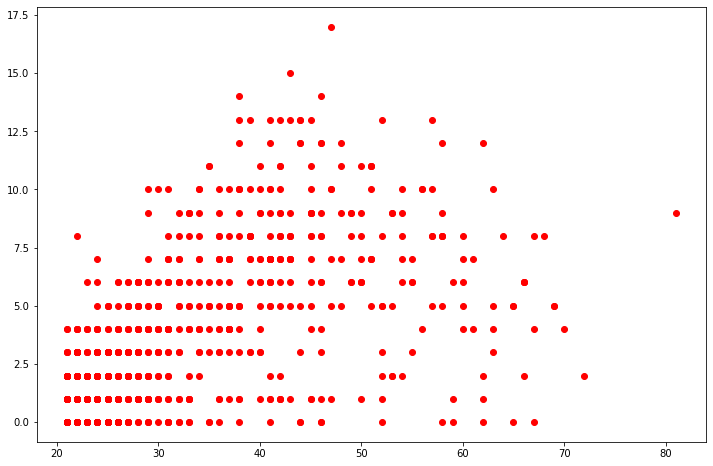

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(diabetes.Age,diabetes.Pregnancies,color="red")

In [12]:
X = diabetes.drop('Outcome',axis=1)
y = diabetes['Outcome']

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [16]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=100),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(n_estimators=100)
          "Decision Tree": DecisionTreeClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
   
    np.random.seed(42)
   
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train_scaled, y_train)
       
        model_scores[name] = model.score(X_test_scaled, y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_scaled,
                             X_test=X_test_scaled,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7857142857142857,
 'KNN': 0.6948051948051948,
 'Random Forest': 0.7597402597402597}

In [18]:
#Let's tune KNN

train_scores = []
test_scores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

In [19]:
train_scores

[1.0,
 0.8322475570032574,
 0.8550488599348535,
 0.8094462540716613,
 0.7980456026058632,
 0.7882736156351792,
 0.7931596091205212,
 0.7768729641693811,
 0.7931596091205212,
 0.7899022801302932,
 0.7866449511400652,
 0.7833876221498371,
 0.7899022801302932,
 0.7899022801302932,
 0.7850162866449512,
 0.7850162866449512,
 0.7833876221498371,
 0.7703583061889251,
 0.7752442996742671,
 0.7719869706840391]

In [20]:
test_scores

[0.6753246753246753,
 0.7012987012987013,
 0.6493506493506493,
 0.7077922077922078,
 0.6623376623376623,
 0.7272727272727273,
 0.6883116883116883,
 0.7467532467532467,
 0.7207792207792207,
 0.7662337662337663,
 0.7337662337662337,
 0.7792207792207793,
 0.7727272727272727,
 0.7727272727272727,
 0.7597402597402597,
 0.7792207792207793,
 0.7727272727272727,
 0.7597402597402597,
 0.7532467532467533,
 0.7272727272727273]

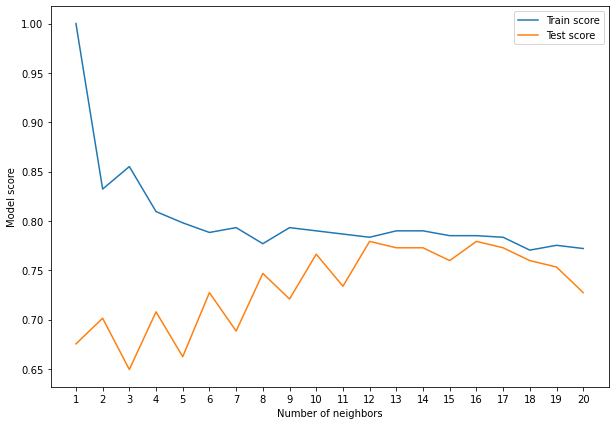

In [21]:
plt.figure(figsize=(10,7))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

In [22]:
print(f"maximum score we get after tuning KNN = {max(test_scores)*100:.2f}%")

maximum score we get after tuning KNN = 77.92%


In [23]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [24]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [26]:
rs_log_reg.score(X_test, y_test)

0.7597402597402597

In [27]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [29]:
rs_rf.score(X_test, y_test)

0.7467532467532467

In [30]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


In [31]:
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [32]:
gs_log_reg.score(X_test, y_test)

0.7532467532467533